In [2]:
import seaborn as sns 
import csv 
import pandas as pd 
import matplotlib.pyplot as plt 

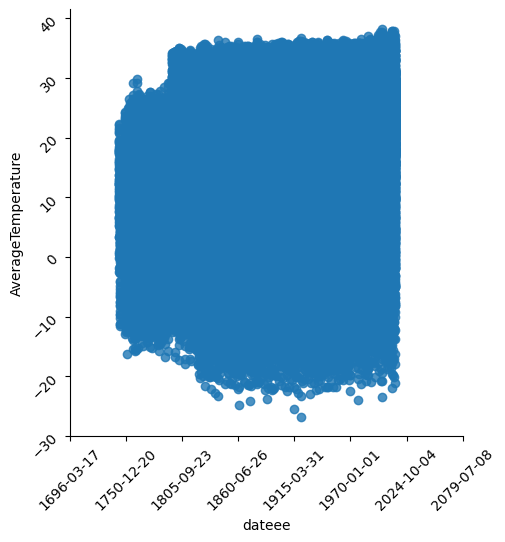

In [15]:
from matplotlib.dates import date2num
from matplotlib import dates


df = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')

df = pd.DataFrame({
    'date': pd.to_datetime(df['dt']),   # pandas dates
    'datenum': dates.datestr2num(df['dt']), # maptlotlib dates
    'AverageTemperature': df['AverageTemperature']
})

def num_to_date(x):
    return dates.num2date(x).strftime('%Y-%m-%d')

df['dateee'] = dates.date2num(df['date'])


lm = sns.lmplot(data=df, x='dateee',y='AverageTemperature')

for ax in lm.axes.flat:
    labels = ax.get_xticks() # get x labels
    new_labels = [num_to_date(label) for label in labels] # convert ordinal back to datetime
    ax.set_xticks(labels)
    ax.set_xticklabels(new_labels, rotation=0) # set new labels
    ax.tick_params(labelrotation=45)



In [5]:
df = pd.read_csv("list_weights_given.csv")

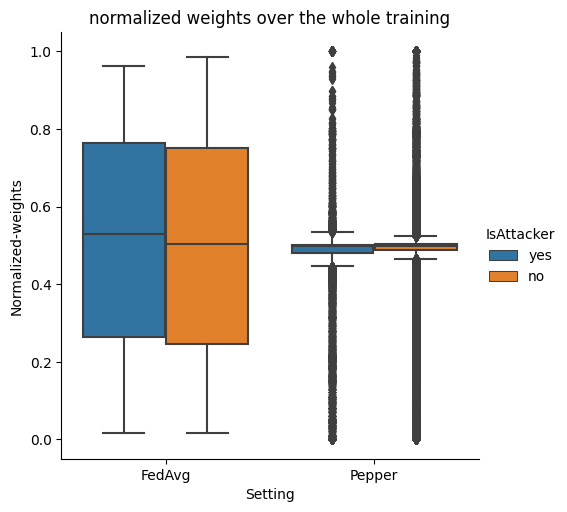

In [6]:
sns.catplot(data = df, x="Setting", y="Normalized-weights", hue="IsAttacker", kind="box").set(title="normalized weights over the whole training")
plt.show()

In [7]:
df['Roundcat_Pepper'] = pd.cut(df[df["Setting"] == "Pepper"]["Round"],[-1,150,300,450,600], labels=['1st quantile','2nd quantile','3rd quantile','4th quantile'])
# df

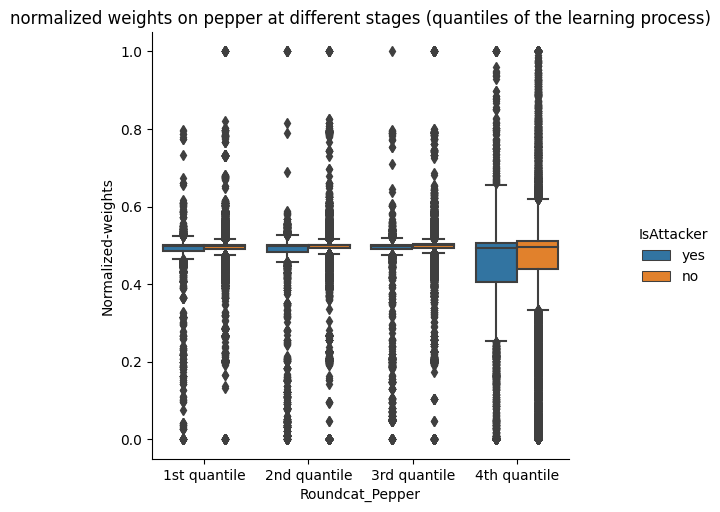

In [8]:
sns.catplot(data = df, x = "Roundcat_Pepper", y ="Normalized-weights", hue="IsAttacker", kind="box").set(title="normalized weights on pepper at different stages (quantiles \
of the learning process)")

In [9]:
df_impact = pd.read_csv("list_attacker_impact.csv")

df_impact["hr_evolution"] = df_impact["After_hr"] - df_impact["Before_hr"]
df_impact["ndcg_evolution"] = df_impact["After_ndcg"] - df_impact["Before_ndcg"]

In [10]:
df_impact['Round'] = 600 - df_impact['Round']

Text(0.5, 1.0, 'Impact on ndcg over last quantile, 9 hops')

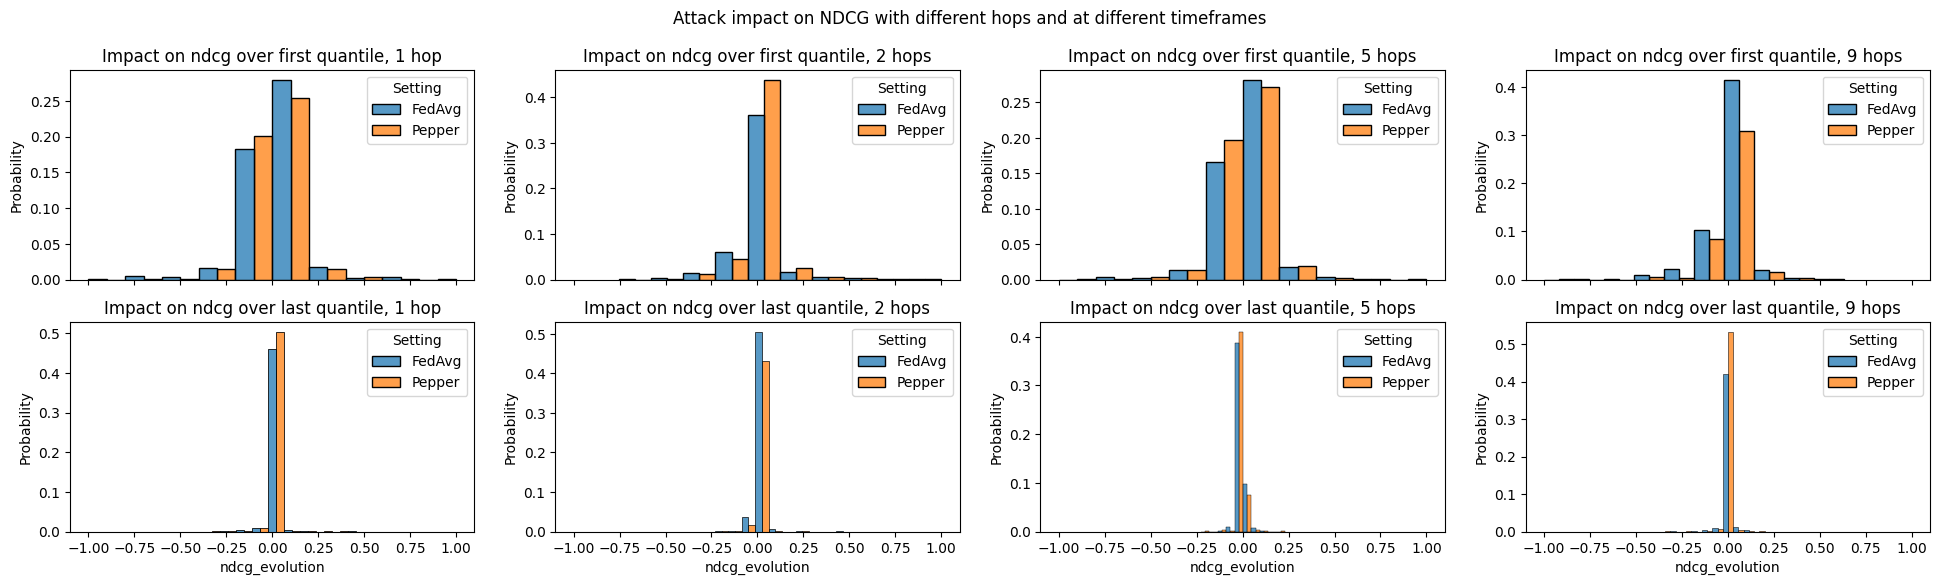

In [11]:
fig, axes = plt.subplots(2, 4, sharex = True, figsize=(24,6))
fig.suptitle('Attack impact on NDCG with different hops and at different timeframes')

sns.histplot(ax=axes[0,0], bins=10, data =df_impact[(df_impact["Hops"] == 1) & (df_impact['Round'] < 50)], x = 'ndcg_evolution', stat='probability',hue='Setting', multiple='dodge')
axes[0,0].set_title("Impact on ndcg over first quantile, 1 hop")
sns.histplot(ax=axes[0,1], bins=10, data =df_impact[(df_impact["Hops"] == 2) & (df_impact['Round'] < 50)], x = 'ndcg_evolution', stat='probability',hue='Setting', multiple='dodge')
axes[0,1].set_title("Impact on ndcg over first quantile, 2 hops")
sns.histplot(ax=axes[0,2], bins=10, data =df_impact[(df_impact["Hops"] == 5) & (df_impact['Round'] < 50)], x = 'ndcg_evolution', stat='probability',hue='Setting', multiple='dodge')
axes[0,2].set_title("Impact on ndcg over first quantile, 5 hops")
sns.histplot(ax=axes[0,3], bins=10, data =df_impact[(df_impact["Hops"] == 9) & (df_impact['Round'] < 50)], x = 'ndcg_evolution', stat='probability',hue='Setting', multiple='dodge')
axes[0,3].set_title("Impact on ndcg over first quantile, 9 hops")


sns.histplot(ax=axes[1,0], bins=10, data =df_impact[(df_impact["Hops"] == 1) & (df_impact['Round'] > 550)], x = 'ndcg_evolution', stat='probability',hue='Setting', multiple='dodge')
axes[1,0].set_title("Impact on ndcg over last quantile, 1 hop")
sns.histplot(ax=axes[1,1], bins=10, data =df_impact[(df_impact["Hops"] == 2) & (df_impact['Round'] > 550)], x = 'ndcg_evolution', stat='probability',hue='Setting', multiple='dodge')
axes[1,1].set_title("Impact on ndcg over last quantile, 2 hops")
sns.histplot(ax=axes[1,2], bins=10, data =df_impact[(df_impact["Hops"] == 5) & (df_impact['Round'] > 550)], x = 'ndcg_evolution', stat='probability',hue='Setting', multiple='dodge')
axes[1,2].set_title("Impact on ndcg over last quantile, 5 hops")
sns.histplot(ax=axes[1,3], bins=10, data =df_impact[(df_impact["Hops"] == 9) & (df_impact['Round'] > 550)], x = 'ndcg_evolution', stat='probability',hue='Setting', multiple='dodge')
axes[1,3].set_title("Impact on ndcg over last quantile, 9 hops")



In [12]:
df_impact["ndcg_progression"] = df_impact["ndcg_evolution"]
df_impact.loc[df_impact["ndcg_evolution"] == 0, "ndcg_progression"] = "did not change"
df_impact.loc[df_impact["ndcg_evolution"] > 0, "ndcg_progression"] = "progressed"
df_impact.loc[df_impact["ndcg_evolution"] < 0, "ndcg_progression"] = "regressed"

df_impact['ndcg_progression']

0              regressed
1             progressed
2             progressed
3         did not change
4         did not change
               ...      
308574        progressed
308575    did not change
308576        progressed
308577    did not change
308578        progressed
Name: ndcg_progression, Length: 308579, dtype: object

## Impact of an attacker on a specific node observation :
* Full training:

* Late rounds: 
  * FedAvg has more progressed nodes but less regressed nodes than pepper (with close numbers!) : most nodes in pepper don't change; 
  * at one hop from the attacker : pepper witnesses more progression
  * more than one hop : pepper witnesses less regression (drastically)


* Early rounds:
  * FedAvg progressed twice as much as pepper if we do not consider hops from the attacker. specifically : 
  * at <=5 hops pepper is actually better : the closest to the attacker the better!      
  * at < 6 FedAvg is drastically better (more progression)

        Disclaimer : this impact was quantized on a validation set and may not reflect the true evolution of models; 


In [17]:
# print('Pepper :\n',df_impact[(df_impact["Hops"] == 1) & (df_impact['Setting'] == 'Pepper') & (df_impact['Round'] > 550)]['ndcg_progression'].value_counts())
# print('FedAvg :\n',df_impact[(df_impact["Hops"] == 1) & (df_impact['Setting'] == 'FedAvg') & (df_impact['Round'] > 550)]['ndcg_progression'].value_counts())

print('Pepper :\n',df_impact[(df_impact["Hops"] == 2) & (df_impact['Setting'] == 'Pepper') & (df_impact['Round'] < 100)]['ndcg_progression'].value_counts())
print('FedAvg :\n',df_impact[(df_impact["Hops"] == 2) & (df_impact['Setting'] == 'FedAvg') & (df_impact['Round'] < 100)]['ndcg_progression'].value_counts())

# print('Pepper :\n',df_impact[(df_impact["Hops"] == 1) & (df_impact['Setting'] == 'Pepper')]['ndcg_progression'].value_counts())
# print('FedAvg :\n',df_impact[(df_impact["Hops"] == 1) & (df_impact['Setting'] == 'FedAvg')]['ndcg_progression'].value_counts())


Pepper :
 regressed         1281
progressed        1148
did not change     700
Name: ndcg_progression, dtype: int64
FedAvg :
 progressed        1050
regressed         1028
did not change     575
Name: ndcg_progression, dtype: int64


In [26]:
df_impact.groupby(['Setting','ndcg_progression']).size()

Setting  ndcg_progression
FedAvg   did not change      51089
         progressed          51931
         regressed           50871
Pepper   did not change      60268
         progressed          46940
         regressed           47480
dtype: int64

Text(0.5, 1.0, 'Impact on ndcg over last quarter, > 1 hops')

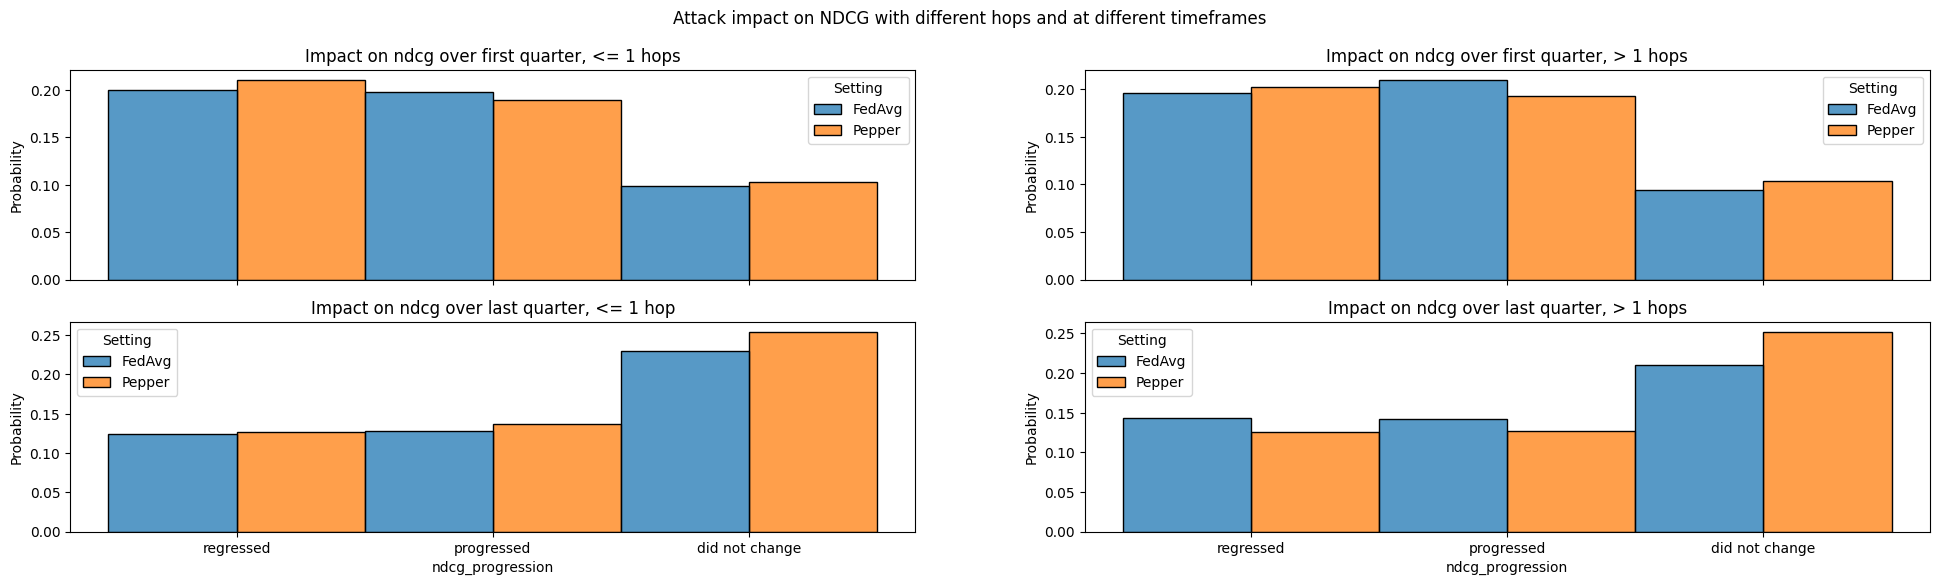

In [37]:
fig, axes = plt.subplots(2, 2, sharex = True, figsize=(24,6))
fig.suptitle('Attack impact on NDCG with different hops and at different timeframes')

sns.histplot(ax=axes[0,0], bins=5, data =df_impact[(df_impact["Hops"] <= 1) & (df_impact['Round'] < 100)], x = 'ndcg_progression', stat='probability',hue='Setting', multiple='dodge')
axes[0,0].set_title("Impact on ndcg over first quarter, <= 1 hops")

sns.histplot(ax=axes[0,1], bins=5, data =df_impact[(df_impact["Hops"] > 1) & (df_impact['Round'] < 100)], x = 'ndcg_progression', stat='probability',hue='Setting', multiple='dodge')
axes[0,1].set_title("Impact on ndcg over first quarter, > 1 hops")

sns.histplot(ax=axes[1,0], bins=5, data =df_impact[(df_impact["Hops"] <= 1) & (df_impact['Round'] > 550)], x = 'ndcg_progression', stat='probability',hue='Setting', multiple='dodge')
axes[1,0].set_title("Impact on ndcg over last quarter, <= 1 hop")
sns.histplot(ax=axes[1,1], bins=5, data =df_impact[(df_impact["Hops"] > 1) & (df_impact['Round'] > 550)], x = 'ndcg_progression', stat='probability',hue='Setting', multiple='dodge')
axes[1,1].set_title("Impact on ndcg over last quarter, > 1 hops")
